Pontificia Universidad Católica de Chile <br>
Departamento de Ciencia de la Computación <br>
IIC3670 -	Procesamiento de Lenguaje Natural<br>
Segundo Semestre 2025<br>


<h1><center>Tarea 2: Transformers </center></h1>
        Profesor: Marcelo Mendoza<br>
        Fecha de entrega: 3 de octubre


---

## Indicaciones

Deberás entregar **SOLO** el archivo .ipynb en el buzón respectivo en canvas.

**IMPORTANTE**:
- Se te dará puntaje tanto por código como por la manera en la que respondas las preguntas planteadas.
- El notebook debe tener todas las celdas de código ejecutadas.
- Cualquier instancia de copia resultará en un 1,1 como nota de curso.
- Esta tarea requiere uso de GPU. Ir a "Entorno de ejecución" --> "Cambiar tipo de entorno de ejecución" --> Marcar "GPU T4".

---

# Introducción

Para esta tarea es recomendable que se familiarice con los recursos del sitio Hugging Face:

https://huggingface.co/

Es necesario que investigue como importar modelos y tokenizadores que permitan manipular las entradas según la pregunta que se busca responder. Asimismo, se recomienda revisar las herramientas que dispone Hugging Face para facilitar el entrenamiento de modelos. Por ejemplo:

* transformers

* datasets

En cuanto a la estructura de esta segunda tarea, se consideran 4 secciones diferentes.
* Parte 1: Flair --> NER
* Parte 2: RoBERTa --> Detección de lenguaje de odio
* Parte 3: SentenceBERT --> Detección de lenguaje de odio
* Parte 4: BERTopic --> Detección de tópicos


# Librerías

## Ya instaladas

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

import torch

import re
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/diegolarraguibel/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Parte 1: Named Entity Recognition (12 puntos)

## 1.1 Spacy (3 puntos)

Utilizando el modelo **es_core_news_md** obtenga las entidades del siguiente texto:

**Título: CENIA impulsa el primer modelo de lenguaje colaborativo de Latinoamérica**

'LatamGPT es el nombre del primer modelo de lenguaje de gran tamaño (Large Language Model, LLM por sus siglas en inglés) que se está desarrollando de manera colaborativa en Latinoamérica y el Caribe. Coordinado por el Centro Nacional de Inteligencia Artificial (CENIA) e impulsado en conjunto con más de 30 instituciones de América Latina y el Caribe y más de 60 expertas y expertos, el proyecto cuenta con el apoyo del Ministerio de Ciencia, Tecnología, Conocimiento e Innovación en la coordinación internacional con los distintos estados de la región y el apoyo de recursos desde CAF para la ejecución del mismo

Actualmente, los modelos de lenguaje que han sido generados en el Norte Global y han estado expuesto a datos, no necesariamente reflejan la idiosincrasia y matices propios de Latinoamérica y el Caribe, una brecha de representatividad que conduce a limitaciones en su desempeño y puede generar inexactitudes o “alucinaciones” respecto de la información que involucra a nuestros países. El hecho se agrava con el uso cada más frecuente de datos sintéticos para el entrenamiento de modelos de otra generación

En febrero de 2023, se comenzó a trabajar en el primer LLM regional, en un modelo de lenguaje con un enfoque colaborativo en la construcción de las bases de datos, de modo que su entrenamiento reflejara la cultura, el lenguaje y la historia de Latinoamérica, ofreciendo información más precisa y representativa de los contextos locales.

“Uno de los problemas que tenemos en Latinoamérica y el Caribe es que los LLM que usamos, si bien funcionan en español y portugués, son bastante limitados en el conocimiento que tienen sobre la región. Al poco andar comienzan a alucinar, porque muy pocos de los datos con los que estos modelos fueron entrenados son de esta parte del mundo. Es importante que en la región podamos desarrollar capacidades para tener cierta independencia y tomar decisiones de cómo esta tecnología impacta a la sociedad. Hasta el momento no tenemos un modelo de lenguaje regional, y esta tarea no la puede asumir solo un grupo ni un solo país: es un desafío que requiere el esfuerzo de toda la región”, comenta Álvaro Soto, director de CENIA.

Por su parte, la ministra de Ciencia, Aisén Etcheverry, se refiere al proyecto como “un esfuerzo colectivo, abierto y que es reflejo de lo que esperamos sea este modelo de lenguaje. Cuando hablamos de Inteligencia Artificial, ésta tiene que proyectar el mundo que somos, su diversidad. Y en el caso de Latinoamérica, no solo hablar español o portugués, sino que entender nuestra idiosincrasia, aportar desde la cultura y desde la visión del mundo, y eso tiene que estar presente en el desarrollo”.

En comparación con otros modelos cerrados (o Propietary), el nuevo modelo de lenguaje LatamGPT será abierto, lo que implica que permitirá que más personas en América Latina y el Caribe lo estudien, usen y mejoren, construyendo sobre él.  “Esto democratiza el conocimiento y promueve el desarrollo de capacidades para poder entender mejor los modelos de lenguaje, sus aplicaciones y límites”, explica el gerente de CENIA., Rodrigo Durán.'


Comente los resultados.

Texto completo disponible en: https://cenia.cl/2025/02/13/cenia-impulsa-el-primer-modelo-de-lenguaje-colaborativo-de-latinoamerica/

RESPUESTA:

In [ ]:
!python3 -m spacy download es_core_news_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 MB 13.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import spacy

sp = spacy.load('es_core_news_md')

In [ ]:
texto = """Título: CENIA impulsa el primer modelo de lenguaje colaborativo de Latinoamérica 'LatamGPT es el nombre del primer modelo de lenguaje de gran tamaño (Large Language Model, LLM por sus siglas en inglés) que se está desarrollando de manera colaborativa en Latinoamérica y el Caribe. Coordinado por el Centro Nacional de Inteligencia Artificial (CENIA) e impulsado en conjunto con más de 30 instituciones de América Latina y el Caribe y más de 60 expertas y expertos, el proyecto cuenta con el apoyo del Ministerio de Ciencia, Tecnología, Conocimiento e Innovación en la coordinación internacional con los distintos estados de la región y el apoyo de recursos desde CAF para la ejecución del mismo Actualmente, los modelos de lenguaje que han sido generados en el Norte Global y han estado expuesto a datos, no necesariamente reflejan la idiosincrasia y matices propios de Latinoamérica y el Caribe, una brecha de representatividad que conduce a limitaciones en su desempeño y puede generar inexactitudes o “alucinaciones” respecto de la información que involucra a nuestros países. El hecho se agrava con el uso cada más frecuente de datos sintéticos para el entrenamiento de modelos de otra generación En febrero de 2023, se comenzó a trabajar en el primer LLM regional, en un modelo de lenguaje con un enfoque colaborativo en la construcción de las bases de datos, de modo que su entrenamiento reflejara la cultura, el lenguaje y la historia de Latinoamérica, ofreciendo información más precisa y representativa de los contextos locales. “Uno de los problemas que tenemos en Latinoamérica y el Caribe es que los LLM que usamos, si bien funcionan en español y portugués, son bastante limitados en el conocimiento que tienen sobre la región. Al poco andar comienzan a alucinar, porque muy pocos de los datos con los que estos modelos fueron entrenados son de esta parte del mundo. Es importante que en la región podamos desarrollar capacidades para tener cierta independencia y tomar decisiones de cómo esta tecnología impacta a la sociedad. Hasta el momento no tenemos un modelo de lenguaje regional, y esta tarea no la puede asumir solo un grupo ni un solo país: es un desafío que requiere el esfuerzo de toda la región”, comenta Álvaro Soto, director de CENIA. Por su parte, la ministra de Ciencia, Aisén Etcheverry, se refiere al proyecto como “un esfuerzo colectivo, abierto y que es reflejo de lo que esperamos sea este modelo de lenguaje. Cuando hablamos de Inteligencia Artificial, ésta tiene que proyectar el mundo que somos, su diversidad. Y en el caso de Latinoamérica, no solo hablar español o portugués, sino que entender nuestra idiosincrasia, aportar desde la cultura y desde la visión del mundo, y eso tiene que estar presente en el desarrollo”. En comparación con otros modelos cerrados (o Propietary), el nuevo modelo de lenguaje LatamGPT será abierto, lo que implica que permitirá que más personas en América Latina y el Caribe lo estudien, usen y mejoren, construyendo sobre él. “Esto democratiza el conocimiento y promueve el desarrollo de capacidades para poder entender mejor los modelos de lenguaje, sus aplicaciones y límites”, explica el gerente de CENIA., Rodrigo Durán.'"""

In [ ]:
doc = sp(texto)

In [ ]:
for entity in doc.ents:
    print(entity.text + ' - ' + entity.label_ + ' - ' + str(spacy.explain(entity.label_)))

CENIA - MISC - Miscellaneous entities, e.g. events, nationalities, products or works of art
Latinoamérica - LOC - Non-GPE locations, mountain ranges, bodies of water
LatamGPT - MISC - Miscellaneous entities, e.g. events, nationalities, products or works of art
Large Language Model - MISC - Miscellaneous entities, e.g. events, nationalities, products or works of art
Latinoamérica - LOC - Non-GPE locations, mountain ranges, bodies of water
Caribe - LOC - Non-GPE locations, mountain ranges, bodies of water
Coordinado por el Centro Nacional de Inteligencia Artificial - MISC - Miscellaneous entities, e.g. events, nationalities, products or works of art
CENIA - MISC - Miscellaneous entities, e.g. events, nationalities, products or works of art
América Latina - LOC - Non-GPE locations, mountain ranges, bodies of water
Caribe - LOC - Non-GPE locations, mountain ranges, bodies of water
Ministerio de Ciencia - LOC - Non-GPE locations, mountain ranges, bodies of water
Tecnología - MISC - Miscella

In [ ]:
string = ""
for entity in doc.ents:
    string += " "  + '"' + entity.text + '"'+ '/' + entity.label_ + ","

print(string)

 "CENIA"/MISC, "Latinoamérica"/LOC, "LatamGPT"/MISC, "Large Language Model"/MISC, "Latinoamérica"/LOC, "Caribe"/LOC, "Coordinado por el Centro Nacional de Inteligencia Artificial"/MISC, "CENIA"/MISC, "América Latina"/LOC, "Caribe"/LOC, "Ministerio de Ciencia"/LOC, "Tecnología"/MISC, "CAF"/ORG, "Actualmente"/PER, "Norte Global"/LOC, "Latinoamérica"/LOC, "Caribe"/LOC, "Latinoamérica"/LOC, "Latinoamérica"/LOC, "Caribe"/LOC, "portugués"/LOC, "Al"/ORG, "Álvaro Soto"/PER, "CENIA"/MISC, "Aisén Etcheverry"/PER, "Cuando hablamos de"/MISC, "Inteligencia Artificial"/MISC, "Latinoamérica"/LOC, "portugués"/PER, "Propietary"/PER, "LatamGPT"/MISC, "América Latina"/LOC, "el Caribe"/LOC, "CENIA"/ORG, "Rodrigo Durán"/PER,


In [ ]:
from spacy import displacy

displacy.render(doc, style='ent', jupyter=True)

## 1.2 Fine-tuning Flair (9 puntos)

Realice un proceso de fine-tuning sobre flair utilizando los embeddings del transformer BETO. Este modelo está disponible en Huggingface con el nombre **dccuchile/bert-base-spanish-wwm-uncased**. Utilice el dataset **CONLL_03_SPANISH** para el entrenamiento, considerando **3 épocas**.

Aplique el modelo sobre el texto presentando en el punto 1.1. Compare sus resultados con lo obtenido anteriormente.

**Observación**

Este entrenamiento demora 20 minutos, aproximadamente.


RESPUESTA:

In [ ]:
from flair.embeddings import TransformerWordEmbeddings
from flair.data import Sentence
import flair.datasets

corpus = flair.datasets.CONLL_03_SPANISH()
print(corpus)

2025-09-27 02:31:12,008 https://www.clips.uantwerpen.be/conll2002/ner/data/esp.testa not found in cache, downloading to /tmp/tmp_v2fl6wf


100%|██████████| 415k/415k [00:00<00:00, 438kB/s]

2025-09-27 02:31:13,716 copying /tmp/tmp_v2fl6wf to cache at /root/.flair/datasets/conll_03_spanish/esp.testa
2025-09-27 02:31:13,719 removing temp file /tmp/tmp_v2fl6wf


2025-09-27 02:31:14,467 https://www.clips.uantwerpen.be/conll2002/ner/data/esp.testb not found in cache, downloading to /tmp/tmp93tlgwwh


100%|██████████| 401k/401k [00:00<00:00, 419kB/s]

2025-09-27 02:31:16,192 copying /tmp/tmp93tlgwwh to cache at /root/.flair/datasets/conll_03_spanish/esp.testb
2025-09-27 02:31:16,194 removing temp file /tmp/tmp93tlgwwh


2025-09-27 02:31:16,937 https://www.clips.uantwerpen.be/conll2002/ner/data/esp.train not found in cache, downloading to /tmp/tmpzv0_gcpc


100%|██████████| 2.03M/2.03M [00:01<00:00, 1.24MB/s]

2025-09-27 02:31:19,394 copying /tmp/tmpzv0_gcpc to cache at /root/.flair/datasets/conll_03_spanish/esp.train
2025-09-27 02:31:19,396 removing temp file /tmp/tmpzv0_gcpc
2025-09-27 02:31:19,398 Reading data from /root/.flair/datasets/conll_03_spanish
2025-09-27 02:31:19,399 Train: /root/.flair/datasets/conll_03_spanish/esp.train
2025-09-27 02:31:19,400 Dev: /root/.flair/datasets/conll_03_spanish/esp.testa
2025-09-27 02:31:19,400 Test: /root/.flair/datasets/conll_03_spanish/esp.testb


Corpus: 8323 train + 1915 dev + 1517 test sentences


In [ ]:
label_dict = corpus.make_label_dictionary(label_type='ner', add_unk=False)

#label_dict = corpus.make_tag_dictionary(tag_type='ner')
print(label_dict)

embeddings = TransformerWordEmbeddings(model='dccuchile/bert-base-spanish-wwm-uncased',
                                       layers="-1",
                                       layer_mean=False,
                                       subtoken_pooling="first",
                                       fine_tune=True,
                                       use_context=True,
                                       model_max_length=512,
                                       )


2025-09-27 02:31:22,620 Computing label dictionary. Progress:


0it [00:00, ?it/s]
8323it [00:00, 46295.47it/s]

2025-09-27 02:31:22,841 Dictionary created for label 'ner' with 4 values: ORG (seen 7390 times), LOC (seen 4914 times), PER (seen 4321 times), MISC (seen 2173 times)


Dictionary with 4 tags: ORG, LOC, PER, MISC


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/310 [00:00<?, ?B/s]

/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:945: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/650 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/134 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [ ]:
from flair.models import SequenceTagger
from flair.trainers import ModelTrainer

tagger = SequenceTagger(
    hidden_size=256,
    embeddings=embeddings,
    tag_dictionary=label_dict,
    tag_format="BIOES",
    tag_type='ner',
    use_crf=False,
    use_rnn=False,
    reproject_embeddings=False,
)


trainer = ModelTrainer(tagger, corpus)

2025-09-27 02:31:37,279 SequenceTagger predicts: Dictionary with 17 tags: O, S-ORG, B-ORG, E-ORG, I-ORG, S-LOC, B-LOC, E-LOC, I-LOC, S-PER, B-PER, E-PER, I-PER, S-MISC, B-MISC, E-MISC, I-MISC


In [ ]:
trainer.fine_tune(
    base_path="resources/taggers/ner-dccuchile/bert-base-spanish-wwm-uncased",
    train_with_dev=False,
    max_epochs=3,
    learning_rate=2.0e-5,
    mini_batch_size=4,
    shuffle=False,
)

2025-09-27 02:31:42,636 ----------------------------------------------------------------------------------------------------
2025-09-27 02:31:42,638 Model: "SequenceTagger(
  (embeddings): TransformerWordEmbeddings(
    (model): BertModel(
      (embeddings): BertEmbeddings(
        (word_embeddings): Embedding(31003, 768)
        (position_embeddings): Embedding(512, 768)
        (token_type_embeddings): Embedding(2, 768)
        (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (encoder): BertEncoder(
        (layer): ModuleList(
          (0-11): 12 x BertLayer(
            (attention): BertAttention(
              (self): BertSdpaSelfAttention(
                (query): Linear(in_features=768, out_features=768, bias=True)
                (key): Linear(in_features=768, out_features=768, bias=True)
                (value): Linear(in_features=768, out_features=768, bias=True)
                (dropout): Drop

/usr/local/lib/python3.12/dist-packages/flair/trainers/trainer.py:499: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler(enabled=use_amp and flair.device.type != "cpu")


2025-09-27 02:32:16,449 epoch 1 - iter 208/2081 - loss 1.44371711 - time (sec): 33.79 - samples/sec: 791.07 - lr: 0.000007 - momentum: 0.000000
2025-09-27 02:32:52,008 epoch 1 - iter 416/2081 - loss 0.91732559 - time (sec): 69.35 - samples/sec: 794.48 - lr: 0.000013 - momentum: 0.000000
2025-09-27 02:33:29,018 epoch 1 - iter 624/2081 - loss 0.74679700 - time (sec): 106.36 - samples/sec: 712.27 - lr: 0.000020 - momentum: 0.000000
2025-09-27 02:34:05,313 epoch 1 - iter 832/2081 - loss 0.62087761 - time (sec): 142.66 - samples/sec: 712.69 - lr: 0.000019 - momentum: 0.000000
2025-09-27 02:34:41,980 epoch 1 - iter 1040/2081 - loss 0.52740998 - time (sec): 179.32 - samples/sec: 722.15 - lr: 0.000019 - momentum: 0.000000
2025-09-27 02:35:22,275 epoch 1 - iter 1248/2081 - loss 0.47233321 - time (sec): 219.62 - samples/sec: 719.35 - lr: 0.000018 - momentum: 0.000000
2025-09-27 02:35:58,727 epoch 1 - iter 1456/2081 - loss 0.42633744 - time (sec): 256.07 - samples/sec: 728.18 - lr: 0.000017 - mom

100%|██████████| 120/120 [00:32<00:00,  3.66it/s]


2025-09-27 02:38:19,993 DEV : loss 0.14007972180843353 - f1-score (micro avg)  0.798
2025-09-27 02:38:20,030 ----------------------------------------------------------------------------------------------------
2025-09-27 02:38:56,136 epoch 2 - iter 208/2081 - loss 0.14096957 - time (sec): 36.10 - samples/sec: 740.43 - lr: 0.000014 - momentum: 0.000000
2025-09-27 02:39:33,307 epoch 2 - iter 416/2081 - loss 0.13172541 - time (sec): 73.27 - samples/sec: 751.94 - lr: 0.000013 - momentum: 0.000000
2025-09-27 02:40:10,247 epoch 2 - iter 624/2081 - loss 0.12271564 - time (sec): 110.21 - samples/sec: 687.37 - lr: 0.000013 - momentum: 0.000000
2025-09-27 02:40:46,513 epoch 2 - iter 832/2081 - loss 0.12152771 - time (sec): 146.48 - samples/sec: 694.09 - lr: 0.000012 - momentum: 0.000000
2025-09-27 02:41:23,847 epoch 2 - iter 1040/2081 - loss 0.11666387 - time (sec): 183.81 - samples/sec: 704.51 - lr: 0.000011 - momentum: 0.000000
2025-09-27 02:42:04,425 epoch 2 - iter 1248/2081 - loss 0.11885265

100%|██████████| 120/120 [00:33<00:00,  3.55it/s]


2025-09-27 02:45:04,294 DEV : loss 0.1415305882692337 - f1-score (micro avg)  0.8384
2025-09-27 02:45:04,333 ----------------------------------------------------------------------------------------------------
2025-09-27 02:45:40,791 epoch 3 - iter 208/2081 - loss 0.09643610 - time (sec): 36.46 - samples/sec: 733.28 - lr: 0.000007 - momentum: 0.000000
2025-09-27 02:46:17,941 epoch 3 - iter 416/2081 - loss 0.08691799 - time (sec): 73.61 - samples/sec: 748.56 - lr: 0.000006 - momentum: 0.000000
2025-09-27 02:46:55,336 epoch 3 - iter 624/2081 - loss 0.08072368 - time (sec): 111.00 - samples/sec: 682.50 - lr: 0.000005 - momentum: 0.000000
2025-09-27 02:47:32,561 epoch 3 - iter 832/2081 - loss 0.08040549 - time (sec): 148.23 - samples/sec: 685.91 - lr: 0.000004 - momentum: 0.000000
2025-09-27 02:48:09,919 epoch 3 - iter 1040/2081 - loss 0.07814260 - time (sec): 185.58 - samples/sec: 697.79 - lr: 0.000004 - momentum: 0.000000
2025-09-27 02:48:50,489 epoch 3 - iter 1248/2081 - loss 0.08022006

100%|██████████| 120/120 [00:33<00:00,  3.61it/s]


2025-09-27 02:51:50,099 DEV : loss 0.1651734858751297 - f1-score (micro avg)  0.8349
2025-09-27 02:51:54,341 ----------------------------------------------------------------------------------------------------
2025-09-27 02:51:54,343 Testing using last state of model ...


100%|██████████| 95/95 [00:26<00:00,  3.62it/s]

2025-09-27 02:52:20,650 
Results:
- F-score (micro) 0.8388
- F-score (macro) 0.8135
- Accuracy 0.7586

By class:
              precision    recall  f1-score   support

         ORG     0.8035    0.8443    0.8234      1400
         LOC     0.8558    0.8432    0.8494      1084
         PER     0.9467    0.9660    0.9562       735
        MISC     0.5942    0.6588    0.6248       340

   micro avg     0.8265    0.8514    0.8388      3559
   macro avg     0.8000    0.8281    0.8135      3559
weighted avg     0.8290    0.8514    0.8398      3559

2025-09-27 02:52:20,651 ----------------------------------------------------------------------------------------------------


{'test_score': 0.8387543252595155}

In [ ]:
import torch
from flair.models import SequenceTagger

path = 'resources/taggers/ner-dccuchile/bert-base-spanish-wwm-uncased/final-model.pt'

# 1) Cargar el estado con weights_only=False (acepta objetos pickle antiguos)
state = torch.load(path, map_location='cpu', weights_only=False)

# 2) Entregar el estado directamente al loader de Flair (acepta dicts además de rutas)
model = SequenceTagger.load(state)

2025-09-27 02:55:17,070 SequenceTagger predicts: Dictionary with 17 tags: O, S-ORG, B-ORG, E-ORG, I-ORG, S-LOC, B-LOC, E-LOC, I-LOC, S-PER, B-PER, E-PER, I-PER, S-MISC, B-MISC, E-MISC, I-MISC


In [ ]:
from flair.data import Sentence
sentence = Sentence(texto)

# predict tags and print
model.predict(sentence)

print(sentence.to_tagged_string())

Sentence[585]: "Título: CENIA impulsa el primer modelo de lenguaje colaborativo de Latinoamérica 'LatamGPT es el nombre del primer modelo de lenguaje de gran tamaño (Large Language Model, LLM por sus siglas en inglés) que se está desarrollando de manera colaborativa en Latinoamérica y el Caribe. Coordinado por el Centro Nacional de Inteligencia Artificial (CENIA) e impulsado en conjunto con más de 30 instituciones de América Latina y el Caribe y más de 60 expertas y expertos, el proyecto cuenta con el apoyo del Ministerio de Ciencia, Tecnología, Conocimiento e Innovación en la coordinación internacional con los distintos estados de la región y el apoyo de recursos desde CAF para la ejecución del mismo Actualmente, los modelos de lenguaje que han sido generados en el Norte Global y han estado expuesto a datos, no necesariamente reflejan la idiosincrasia y matices propios de Latinoamérica y el Caribe, una brecha de representatividad que conduce a limitaciones en su desempeño y puede gene

Resultado spacy:
 ["CENIA"/MISC, "Latinoamérica"/LOC, "LatamGPT"/MISC, "Large Language Model"/MISC, "Latinoamérica"/LOC, "Caribe"/LOC, "Coordinado por el Centro Nacional de Inteligencia Artificial"/MISC, "CENIA"/MISC, "América Latina"/LOC, "Caribe"/LOC, "Ministerio de Ciencia"/LOC, "Tecnología"/MISC, "CAF"/ORG, "Actualmente"/PER, "Norte Global"/LOC, "Latinoamérica"/LOC, "Caribe"/LOC, "Latinoamérica"/LOC, "Latinoamérica"/LOC, "Caribe"/LOC, "portugués"/LOC, "Al"/ORG, "Álvaro Soto"/PER, "CENIA"/MISC, "Aisén Etcheverry"/PER, "Cuando hablamos de"/MISC, "Inteligencia Artificial"/MISC, "Latinoamérica"/LOC, "portugués"/PER, "Propietary"/PER, "LatamGPT"/MISC, "América Latina"/LOC, "el Caribe"/LOC, "CENIA"/ORG, "Rodrigo Durán"/PER]

Resultado flair dccuchile:
["CENIA"/ORG, "LatamGPT"/MISC, "Large Language Model"/MISC, "LLM"/MISC, "Latinoamérica"/LOC, "Caribe"/LOC, "Centro Nacional de Inteligencia Artificial"/ORG, "CENIA"/ORG, "América Latina"/LOC, "Caribe"/LOC, "Ministerio de Ciencia"/ORG, "Tecnología"/ORG, "CAF"/ORG, "Latinoamérica"/LOC, "Caribe"/LOC, "LLM"/MISC, "Latinoamérica"/LOC, "Latinoamérica"/LOC, "Caribe"/LOC, "LLM"/MISC, "español"/LOC, "Álvaro Soto"/PER, "CENIA"/ORG, "Ciencia"/MISC, "Aisén Etcheverry"/PER, "LatamGPT"/MISC, "América Latina"/LOC, "Caribe"/LOC, "CENIA."/ORG, "Rodrigo Durán"/PER]

El modelo de spacy sufre un poco de problemas para identificar correctamente entidades, por ejemplo, "Coordinado por el Centro Nacional de Inteligencia Artificial", "Actualmente", "Cuando hablamos de", son entidades mal seleccionadas, que no deberían ser etiquetadas. En cambio el modelo de dccuchile sufre pocos problemas de identificación, fuera de estos, todo lo seleccionado está bien identificado.

Sumado a lo anterior, spacy tiene problemas al identificar entidades, como por ejemplo: "CENIA" los clasifica como MISC siendo que debería ser ORG. "Ministerio de Ciencia" lo clasifica incorrectamente como LOC, "portugués" lo clasifica como LOC, "AI" lo clasifica coomo ORG, "portugués" como PER, "Propietary" como PER.

El modelo dccuchile parece desempeñarse mejor, por ejemplo, el primer CENIA lo identifica como ORG correctamente, a diferencia de spacy. La única pifia del modelo dccuchile parece ser "Tecnología" y "español", el resto de etiquetas nombradas están correctas.

Por lo tanto flair es la mejor opción en este caso.


# Parte 2: RoBERTa-Base (18 puntos)

En esta sección se debe trabajar con el dataset ```DYNAHATE(DH)```. Este conjunto de datos fue elaborado para abordar la tarea de detección de lenguaje de odio.

**Bertie Vidgen, Tristan Thrush, Zeerak Waseem, and Douwe Kiela. 2021. Learning from the Worst: Dynamically Generated Datasets to Improve Online Hate Detection.**
https://aclanthology.org/2021.acl-long.132/



## 2.1 BERT vs RoBERTa (4 puntos)

Explique las principales diferencias entre los modelos BERT y RoBERTa.

* BERT: https://aclanthology.org/N19-1423.pdf
* RoBERTa: https://arxiv.org/abs/1907.11692


## 2.2 Análisis descriptivo (3 puntos)

Concatene los conjuntos de train y test para tener una mirada general del dataset. Grafique el número de ejemplos por tipo de clase. ¿El dataset está balanceado?

RESPUESTA:

## 2.3 Entrenar clasificador basado en la arquitectura RoBERTa-Base (8 puntos)

Utilizando el modelo RoBERTa-base, construya un clasificador para la variable ```type```, en función del texto (```text```). Para esto solo utilice el conjunto de train.

Considere un entrenamiento por 2 épocas.

**Observación**

Este entrenamiento demora 30 minutos, aproximadamente.

## 2.4 Evaluar clasificador (3 puntos)

Calcule las métricas Precision, Recall y F1-score para el conjunto test (general y por clase). Comente sus resultados.

Obtenga una matriz de confusión. Comente.

# Parte 3: Sentence-BERT (18 puntos)

En esta sección debe trabajar con el dataset DH, utilizado en la sección anterior.

Para crear embeddings mediante Sentence-BERT (SentenceTransformers), se recomienda revisar la documentación: https://sbert.net/

In [22]:
!pip install -U "transformers>=4.41" "huggingface-hub>=0.23" "accelerate>=0.30" --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 10.0 MB/s  0:00:01ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 9.4 MB/s  0:00:00 eta 0:00:01
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.19.1
    Uninstalling tokenizers-0.19.1:
      Successfully uninstalled tokenizers-0.19.1
  Attempting uninstall: transformers
    Found existing installation: transformers 4.41.2
    Uninstalling transformers-4.41.2:╺━━━━━━━━━━━━━━━━━━━ 1/2 [transformers]
      Successfully uninstalled transformers-4.41.2━━━━━━━━━━━━ 1/2 [transformers]
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [transformers] [transformers]


In [25]:
df_test = pd.read_csv("Data/dh_test.csv")
df_train = pd.read_csv("Data/dh_train.csv")
df_val = pd.read_csv("Data/dh_val.csv")

## 3.1 Descripción Sentence BERT (4 puntos)


Describa las principales características del modelo Sentence BERT.

Publicación Sentence BERT: https://aclanthology.org/D19-1410.pdf


RESPUESTA:

La principal innovación de SBERT consiste en modificar la arquitectura original de BERT para generar un espacio de embeddings a partir de aprendizaje contrastivo, el cual luego puede usarse para medir similitud semántica entre pares de oraciones. 

Para esto, se utilizan redes siamesas, es decir, dos o más copias idénticas de BERT con pesos compartidos que procesan entradas distintas en paralelo. Cada oración se codifica de manera independiente y, tras una capa de pooling se obtiene un embedding fijo.

## 3.2 Creación de embeddings (4 puntos)

Utilizando Sentence Transformers, obtenga las representaciones vectoriales de cada comentario de los conjuntos train y test.

**Observación**

Se recomienda guardar los dataframes creados.

In [34]:
##############################################################
#### creando y guardando embeddings para todo el dataset #####
##############################################################
from sentence_transformers import SentenceTransformer
# model = SentenceTransformer("bert-base-uncased", device='mps')

# train_emb = model.encode(df_train['text'].tolist())
# test_emb = model.encode(df_test['text'].tolist())

# np.save('Data/train_emb.npy', train_emb)
# np.save('Data/test_emb.npy', test_emb)

In [47]:
train_emb = np.load('Data/train_emb.npy')
test_emb = np.load('Data/test_emb.npy')

RESPUESTA:

## 3.3 Visualización de embeddings SentenceBERT (7 puntos)

Utilizando una técnica de reducción de dimensionalidad, muestre gráficamente el comportamiento de los embeddings creados con Sentence-BERT en el punto 3.2. Para ello, debe elaborar dos gráficos:

* Gráfico 1: Utilice la variable **label** para distinguir cada punto.
* Gráfico 2: Utilice la variable **type** para distinguir cada punto.

Comente los resultados.

**Observaciones**
* Cada gráfico debe tener 2 dimensiones.
* Se recomienda revisar las técnicas de reducción de dimensionalidad PCA, UMAP y TSNE.

RESPUESTA:

In [44]:
train_emb.shape

(4124, 768)

In [48]:
pca = PCA(n_components=2)
pca_train = pca.fit_transform(train_emb)
pca_test = pca.fit_transform(test_emb)
pca_train.shape, pca_test.shape

((33006, 2), (4124, 2))

Text(0.5, 1.0, 'Test set PCA')

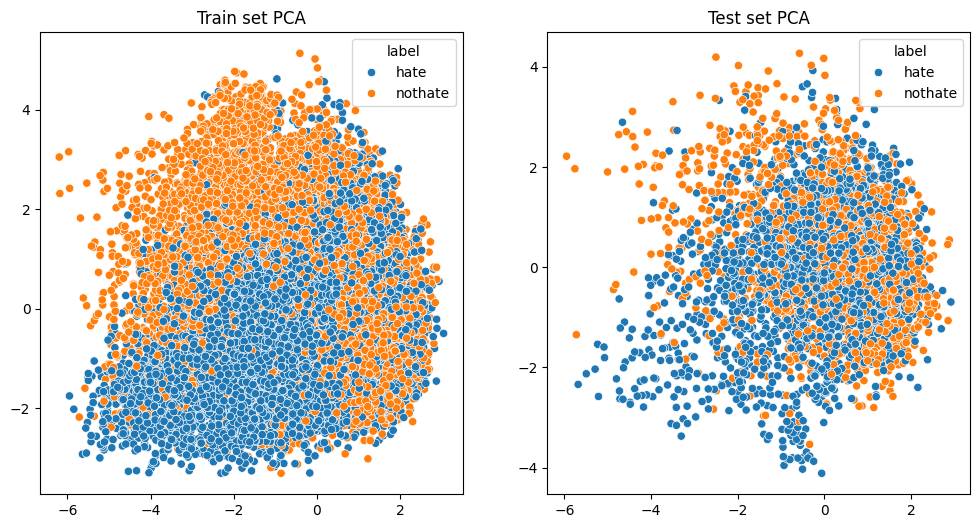

In [50]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.scatterplot(x=pca_train[:, 0], y=pca_train[:, 1], hue=df_train['label'], ax=ax[0])
sns.scatterplot(x=pca_test[:, 0], y=pca_test[:, 1], hue=df_test['label'], ax=ax[1])
ax[0].set_title('Train set PCA')
ax[1].set_title('Test set PCA')

## 3.4 Clasificador Embeddings Sentence Transformer (3 puntos)

Considerando los embeddings creados en el punto 3.2, entrene un clasificador mediante una técnica de machine learning para predecir la variable ```type```.

Calcule las métricas Precision, Recall y F1-score para el conjunto test (general y por clase). Comente los resultados.

Obtenga una matriz de confusión. Comente.

RESPUESTA:

# Parte 4: BERTopic (12 puntos)



## 4.1 Descripción BERTopic (4 puntos)

Describa las principales características del modelo BERTopic.

RESPUESTA:

BERTopic es un modelo que utiliza transformers y class based TF-IDF para crear representasiones de documentos en un espacio que permite ser comparado semánticamente. En el paper (https://arxiv.org/pdf/2203.05794) mencionan lo siguiente:

- Utilizan UMAP para reducir la dimensionalidad.
- Utilizan HDBSCAN para hacer los clusters.
- Usan TF-IDF por cluster. Por lo que se modela la importancia de las palabras por cada cluster.

## 4.2 Identificar tópicos con BERTopic (8 puntos)

Utilizando BERTopic, determine los principales tópicos asociados a las sentencias de la columna ```short_description```. Justifique sus decisiones.

Presente sus resultados mediante algún esquema de visualización (ver librería  BERTopic).

**Observaciones**

* Utilice un modelo pre-entrenado para construir los embeddings. https://huggingface.co/spaces/mteb/leaderboard

* Evalúe eliminar stopwords para facilitar la interpretación de los resultados.

Bibliografía del Dataset: https://www.kaggle.com/datasets/rmisra/news-category-dataset/versions/2?resource=download#

RESPUESTA:

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("news.csv", engine='python', on_bad_lines='warn')

In [ ]:
df.head()

,category,headline,authors,link,short_description,date
0,WORLD NEWS,South Korean President Meets North Korea's Kim...,NaN,https://www.huffingtonpost.com/entry/south-kor...,The two met to pave the way for a summit betwe...,2018-05-26
1,WEIRD NEWS,Weird Father's Day Gifts Your Dad Doesn't Know...,David Moye,https://www.huffingtonpost.com/entry/weird-fat...,Why buy a boring tie when you can give him tes...,2018-05-26
2,WEIRD NEWS,Mystery 'Wolf-Like' Animal Reportedly Shot In ...,Hilary Hanson,https://www.huffingtonpost.com/entry/montana-w...,“We have no idea what this was until we get a ...,2018-05-26
3,WORLD NEWS,North Korea Still Open To Talks After Trump Ca...,"Josh Smith and Christine Kim, Reuters",https://www.huffingtonpost.com/entry/north-kor...,Trump’s announcement came after repeated threa...,2018-05-25
4,WORLD NEWS,2 Men Detonate Bomb Inside Indian Restaurant N...,NaN,https://www.huffingtonpost.com/entry/mississau...,"Fifteen people were taken to the hospital, thr...",2018-05-25


In [ ]:
!pip install bertopic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.0/153.0 kB 7.5 MB/s eta 0:00:00


In [ ]:
from bertopic import BERTopic

/usr/local/lib/python3.12/dist-packages/hdbscan/plots.py:448: SyntaxWarning: invalid escape sequence '\l'
  axis.set_ylabel('$\lambda$ value')
/usr/local/lib/python3.12/dist-packages/hdbscan/robust_single_linkage_.py:175: SyntaxWarning: invalid escape sequence '\{'
  $max \{ core_k(a), core_k(b), 1/\alpha d(a,b) \}$.


In [ ]:
!huggingface-cli login

⚠️  Warning: 'huggingface-cli login' is deprecated. Use 'hf auth login' instead.

    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To log in, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) n
Token is valid (permission: fineGrained).
The token `gemma2` has been saved to /root/.cache/huggingface/stored_tokens
Your token has been saved to /root/.ca

Se seleccionaron los embeddings de gemma debido a que estaban en el 8vo lugar del ranking en hugging face y además es el que tiene menor dimensionalidad del top 10, por lo que desde el punto de vista de cómputo es la mejor opción.

In [ ]:
from sentence_transformers import SentenceTransformer
from bertopic import BERTopic

# Carga el modelo correcto (requiere haber aceptado la licencia y estar logueado)
st_model = SentenceTransformer("google/embeddinggemma-300m")

modules.json:   0%|          | 0.00/573 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/997 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/18.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/58.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.49k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.21G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.16M [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/4.69M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/33.4M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/35.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/662 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/312 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/134 [00:00<?, ?B/s]

2_Dense/model.safetensors:   0%|          | 0.00/9.44M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/134 [00:00<?, ?B/s]

3_Dense/model.safetensors:   0%|          | 0.00/9.44M [00:00<?, ?B/s]

In [ ]:
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer

# Ensure no missing values in the 'short_description' column
docs = df.dropna(subset=['short_description'])['short_description'].to_list()

# Use it as an embedding generator in BERTopic
topic_model = BERTopic(embedding_model=st_model)

topics, probs = topic_model.fit_transform(docs)

In [ ]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,10423,-1_the_of_in_to,"[the, of, in, to, and, is, for, on, that, are]",[The way to solve problems is through food. I ...
1,0,1008,0_my_me_you_life,"[my, me, you, life, when, that, to, and, was, it]",[I knew there were some things about my person...
2,1,1006,1_said_my_you_he,"[said, my, you, he, this, me, don, like, just,...","[""He, you know, says what’s on his mind, wheth..."
3,2,769,2_recipes_delicious_these_you,"[recipes, delicious, these, you, food, your, e...",[Stuck in a lunch rut? Mix up your midday mea...
4,3,482,3_it_time_all_easy,"[it, time, all, easy, about, not, easier, just...","[It's about time!, It's about time., It's abou..."
...,...,...,...,...,...
157,156,11,156_earthquake_damage_haiti_2007,"[earthquake, damage, haiti, 2007, magnitude, s...",[The most powerful Atlantic storm since 2007 k...
158,157,10,157_fires_wildfires_wildfire_deadly,"[fires, wildfires, wildfire, deadly, county, m...",[Recent weeks have seen several major fires in...
159,158,10,158_rights_civil_equal_employment,"[rights, civil, equal, employment, religious, ...",[Just as the Civil Rights Movement was not a m...
160,159,10,159_wild_employees_donalds_raiz,"[wild, employees, donalds, raiz, melina, papag...",[Melina Papageorgiou gives the controversial s...


In [ ]:
topic_model.visualize_topics()

In [ ]:
topic_model.visualize_hierarchy()

Se generaron 161 tópicos: En las visualizaciones se puede observar que se formaron distintos clusters de tópicos. Además en la visualización jerarquica se puede observar que temas relacionados están bien relacionado semánticamente como por ejemplo: hay 3 tópicos, cats, dogs, elephant and animas y todos ellos están dentro del mismo subgrupo de la jerarquía. Así se pueden ver más ejemplos.

## Ahora se probará quitando stopwords

In [22]:
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer, sent_tokenize
from nltk.stem import WordNetLemmatizer
import numpy as np
import nltk

nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')
# Load stop-words
stop_words = set(stopwords.words('english'))

# Initialize tokenizer
# It's also possible to try with a stemmer or to mix a stemmer and a lemmatizer
tokenizer = RegexpTokenizer('[\'a-zA-Z]+')

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

def tokenize(document):
    words = []

    for sentence in sent_tokenize(document):
        tokens = [lemmatizer.lemmatize(t.lower()) for t in tokenizer.tokenize(sentence) if t.lower() not in stop_words and len(t) > 2]
        words += tokens

    text = ' '.join(words)
    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [23]:
docs2 = [tokenize(doc) for doc in docs]

In [27]:
# Use it as an embedding generator in BERTopic
topic_model2 = BERTopic(embedding_model=st_model)

topics2, probs2 = topic_model2.fit_transform(docs2)

In [30]:
topic_model2.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,12588,-1_year_one_said_say,"[year, one, said, say, world, new, time, like,...",[director comey said many important thing life...
1,0,435,0_life_would_year_friend,"[life, would, year, friend, mother, know, husb...",[often woman come work hit wall dating life th...
2,1,340,1_recipe_dish_delicious_easy,"[recipe, dish, delicious, easy, sweet, salad, ...",[make easter feast unforgettable ending sweet ...
3,2,282,2_climate_change_global_carbon,"[climate, change, global, carbon, warming, ene...",[turn industry right fighting climate change s...
4,3,279,3_thump_start_tis_prepare,"[thump, start, tis, prepare, least, sort, baaa...","[least still make, thump thump thump, start sa..."
...,...,...,...,...,...
202,201,11,201_official_angie_confirming_anonymously,"[official, angie, confirming, anonymously, hea...","[official nov 'angie martinez day' nyc, school..."
203,202,11,202_embarrassing_awkward_shame_connotation,"[embarrassing, awkward, shame, connotation, em...","[mom embarrassing, embarrassing, that's embarr..."
204,203,10,203_unclear_catalyzed_mizzou_pascal,"[unclear, catalyzed, mizzou, pascal, realizes,...",[mizzou seems catalyzed year tension inequalit...
205,204,10,204_buffalo_football_loving_faceoff,"[buffalo, football, loving, faceoff, duet, con...",[three consecutive year inspired ncaa's march ...


In [28]:
topic_model2.visualize_topics()

In [29]:
topic_model2.visualize_hierarchy()

Al quitar los stopwords se ven que se logran identificar más tópicos, 206 en este caso. Sobre los primeros tópicos se identifican casi los mismos que en el caso anterior, temás de cocina, vida, etc. Se identifican más outliers que en el caso anterior, sin embargo se identifican más tópicos. Esto es interesante, porque parece ser que sin stopwords el modelo es capaz de diferenciar mejor entre documentos, pero cae en el problema de que algunos se diferencian mucho y se vuelven outliers.